In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)


In [31]:
fin_nifty_index = pd.read_csv(r"E:\2cents_\Dataset_Provided\NewFolder\Indexspotprices\zip\idx_1m\NIFTY FIN SERVICE_NSE_minute.csv")

In [32]:
fin_nifty_index['date_only'] = pd.to_datetime(fin_nifty_index['date'])

# Extract the date part and store it in a new column 'date_only' in y-m-d format
fin_nifty_index['date_only'] = fin_nifty_index['date_only'].dt.strftime('%Y-%m-%d')

In [33]:
fin_nifty_index

,date,open,high,low,close,volume,date_only
0,2015-01-09 09:15:00+05:30,7473.50,7473.65,7466.35,7466.35,0,2015-01-09
1,2015-01-09 09:16:00+05:30,7467.60,7468.70,7460.70,7463.20,0,2015-01-09
2,2015-01-09 09:17:00+05:30,7463.20,7476.70,7463.20,7476.70,0,2015-01-09
3,2015-01-09 09:18:00+05:30,7476.70,7485.55,7476.70,7485.45,0,2015-01-09
4,2015-01-09 09:19:00+05:30,7485.45,7488.70,7483.75,7484.95,0,2015-01-09
...,...,...,...,...,...,...,...
878156,2024-07-11 15:25:00+05:30,23624.95,23631.35,23622.15,23631.35,0,2024-07-11
878157,2024-07-11 15:26:00+05:30,23630.80,23630.80,23624.40,23629.00,0,2024-07-11
878158,2024-07-11 15:27:00+05:30,23629.30,23631.35,23622.45,23624.15,0,2024-07-11
878159,2024-07-11 15:28:00+05:30,23625.20,23626.15,23615.75,23620.30,0,2024-07-11


In [34]:
filtered_data = fin_nifty_index[fin_nifty_index['date'].str.contains('15:29:00\+05:30')]


<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\risha\AppData\Local\Temp\ipykernel_16764\2129247902.py:1: SyntaxWarning: invalid escape sequence '\+'
  filtered_data = fin_nifty_index[fin_nifty_index['date'].str.contains('15:29:00\+05:30')]


In [36]:
filtered_data.reset_index(inplace= True)

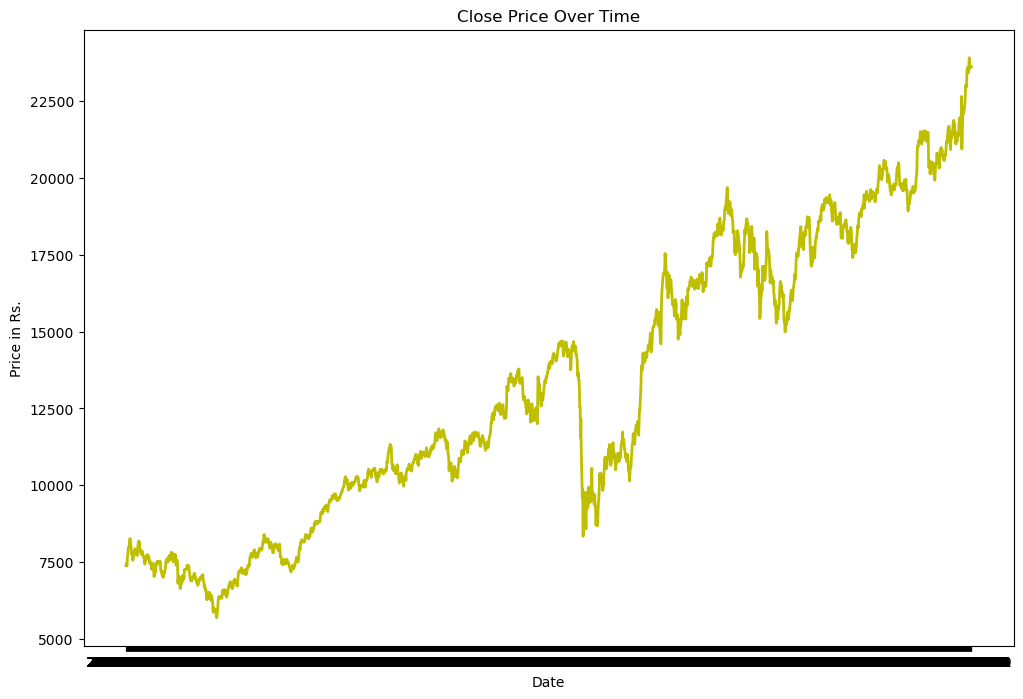

In [37]:
# Plot 'close' against 'date_only'
plt.figure(figsize=(12, 8))
plt.plot(filtered_data['date_only'], filtered_data['close'], color='y', lw=2)
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Close Price Over Time')
plt.show()

In [38]:
short_MA = 10
long_MA = 50

# Create a table 'signals' with the `signal` column
signals = pd.DataFrame(index=filtered_data.index)
signals['signal'] = 0.0

# Compute short simple moving average 
signals['short_mavg'] = filtered_data['close'].rolling(window=short_MA, min_periods=1, center=False).mean()

# Compute long simple moving average 
signals['long_mavg'] = filtered_data['close'].rolling(window=long_MA, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_MA:] = np.where(signals['short_mavg'][short_MA:] 
                                            > signals['long_mavg'][short_MA:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
# print(signals.tail(10))

      signal  short_mavg  long_mavg  positions
2301     1.0   23105.365  21908.779        0.0
2302     1.0   23225.965  21958.107        0.0
2303     1.0   23315.380  22009.368        0.0
2304     1.0   23411.795  22063.831        0.0
2305     1.0   23495.945  22114.277        0.0
2306     1.0   23564.270  22160.476        0.0
2307     1.0   23617.605  22203.699        0.0
2308     1.0   23629.910  22245.668        0.0
2309     1.0   23638.745  22290.179        0.0
2310     1.0   23639.850  22326.798        0.0


C:\Users\risha\AppData\Local\Temp\ipykernel_16764\3524404456.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_MA:] = np.where(signals['short_mavg'][short_MA:]


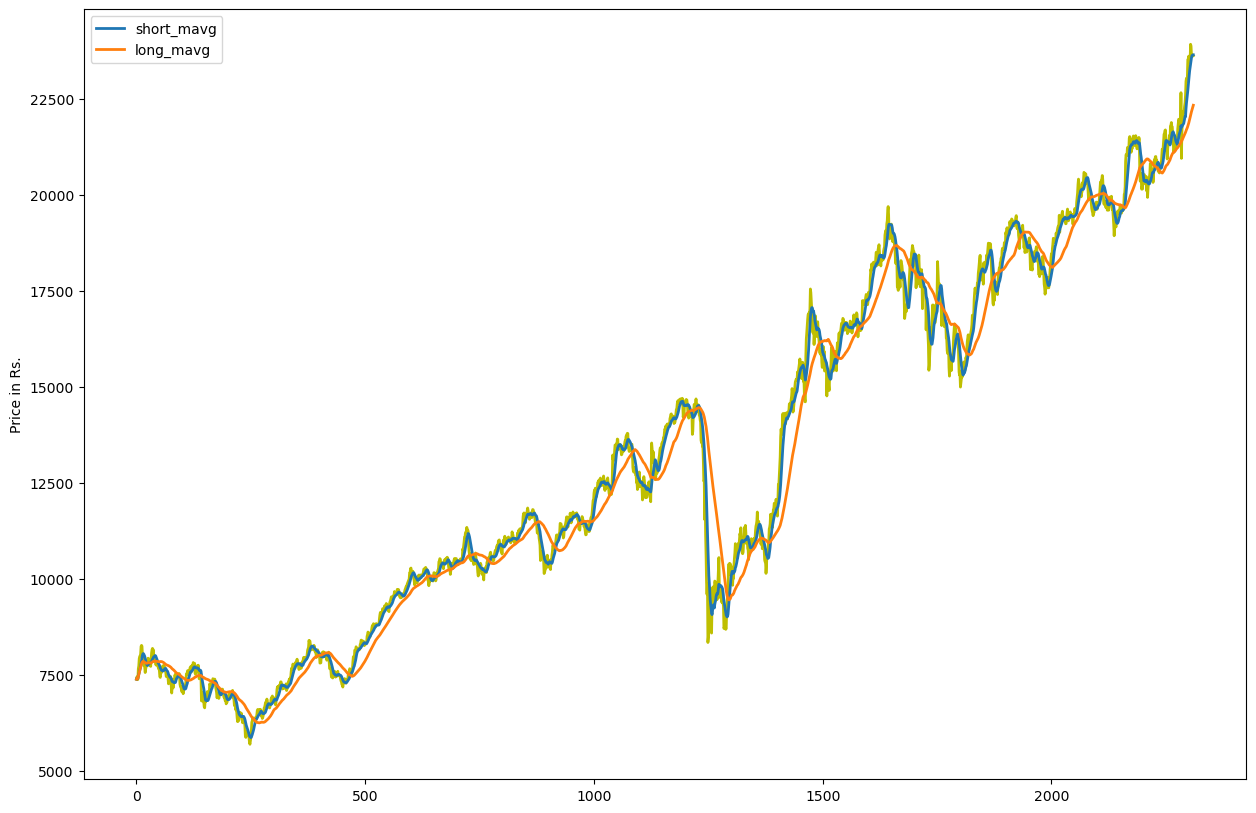

In [40]:
# Initialize the plot figure
fig = plt.figure(figsize = (15,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in Rs.')

# Plot the closing price
filtered_data['close'].plot(ax=ax1, color='y', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
         
# Show the plot
plt.show()

In [46]:
# Concatenate vertically
combined_data = pd.concat([filtered_data, signals], axis=1)

# Reset the index if needed
combined_data.reset_index(drop=True, inplace=True)

In [54]:
# Calculate the difference and store it in a new column 'mavg_diff'
combined_data['mavg_diff'] = combined_data['short_mavg'] - combined_data['long_mavg']

# Keep only rows where the difference is positive
filtered_positive_diff = combined_data[combined_data['mavg_diff'] > 0]

In [59]:
filtered_positions = filtered_positive_diff[filtered_positive_diff['positions'] == 1]

In [57]:
df = pd.read_csv("E:/2cents_/merged_finnifty.csv")

C:\Users\risha\AppData\Local\Temp\ipykernel_16764\3091726382.py:1: DtypeWarning: Columns (4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:/2cents_/merged_finnifty.csv")


In [61]:
dates_to_keep = filtered_positions['date_only']

In [63]:
filtered_df = df[df['date'].isin(dates_to_keep)]


In [65]:
filtered_df = filtered_df[filtered_df['instrument_type'] == 'CE']

In [68]:
filtered_df['strike_check'] = filtered_df.apply(lambda row: 'low' if row['strike_price'] < row['spot_price'] else 'high', axis=1)


C:\Users\risha\AppData\Local\Temp\ipykernel_16764\501216576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['strike_check'] = filtered_df.apply(lambda row: 'low' if row['strike_price'] < row['spot_price'] else 'high', axis=1)


In [83]:
filtered_df = filtered_df[(filtered_df['delta'] > 0.4) & filtered_df['delta'] < 0.6]

In [114]:
# Calculate the bounds for the strike price based on the spot price
filtered_df['lower_bound'] = filtered_df['spot_price'] * 0.995  # 5% lower
filtered_df['upper_bound'] = filtered_df['spot_price'] * 1.005  # 5% higher

# Filter to keep only those options whose strike prices are within the bounds
filtered_df = filtered_df[
    (filtered_df['strike_price'] >= filtered_df['lower_bound']) &
    (filtered_df['strike_price'] <= filtered_df['upper_bound'])
]

# Optionally, drop the bounds columns if you don't need them anymore
filtered_df.drop(columns=['lower_bound', 'upper_bound'], inplace=True)


In [115]:
filtered_df

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,strike_price,instrument_type,expiry_date,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho,strike_check
1210329,FINNIFTY05DEC2320000CE,2023-11-30 10:29:59,2023-11-30,10:29:59,104.5,104.5,95.35,95.35,83680,848880,20000.0,CE,2023-12-05 15:30:00,FINNIFTY,NaN,5.0,19906.95,0.140901,0.391997,0.001170,8.952344,-12.624470,1.056637,high
1210330,FINNIFTY05DEC2320000CE,2023-11-30 10:30:59,2023-11-30,10:30:59,96.25,97.8,93.45,95.55,77440,848880,20000.0,CE,2023-12-05 15:30:00,FINNIFTY,NaN,5.0,19909.25,0.140082,0.394054,0.001179,8.966389,-12.570960,1.062347,high
1210442,FINNIFTY05DEC2320000CE,2023-11-30 12:22:59,2023-11-30,12:22:59,101.7,101.7,95.65,95.65,54240,913320,20000.0,CE,2023-12-05 15:30:00,FINNIFTY,NaN,5.0,19913.75,0.138148,0.397902,0.001198,8.992071,-12.433117,1.073080,high
1210459,FINNIFTY05DEC2320000CE,2023-11-30 12:39:59,2023-11-30,12:39:59,100.5,100.5,98.00,98.6,19520,945440,20000.0,CE,2023-12-05 15:30:00,FINNIFTY,NaN,5.0,19908.25,0.143901,0.395822,0.001149,8.976915,-12.928563,1.066699,high
1210460,FINNIFTY05DEC2320000CE,2023-11-30 12:40:59,2023-11-30,12:40:59,98.6,100.0,97.25,100.0,27280,945440,20000.0,CE,2023-12-05 15:30:00,FINNIFTY,NaN,5.0,19911.30,0.144055,0.399442,0.001150,9.000183,-12.975994,1.076554,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077356,FINNIFTY2271216300CE,2022-07-12 15:07:00,2022-07-12,15:07:00,0.15,0.15,0.10,0.1,-4168,11200,16300.0,CE,2022-07-12 15:30:00,FINNIFTY,NaN,0.0,16222.95,0.037379,0.007759,0.000672,0.181187,-0.338805,0.003446,high
8077357,FINNIFTY2271216300CE,2022-07-12 15:08:00,2022-07-12,15:08:00,0.1,0.1,0.05,0.05,-23264,11200,16300.0,CE,2022-07-12 15:30:00,FINNIFTY,NaN,0.0,16219.65,0.035801,0.004202,0.000407,0.105118,-0.188263,0.001866,high
8077358,FINNIFTY2271216300CE,2022-07-12 15:09:00,2022-07-12,15:09:00,0.05,0.1,0.05,0.05,-12432,-25736,16300.0,CE,2022-07-12 15:30:00,FINNIFTY,NaN,0.0,16225.25,0.033504,0.004405,0.000454,0.109674,-0.183824,0.001957,high
8077359,FINNIFTY2271216300CE,2022-07-12 15:10:00,2022-07-12,15:10:00,0.05,0.1,0.05,0.1,24424,-25736,16300.0,CE,2022-07-12 15:30:00,FINNIFTY,NaN,0.0,16229.20,0.034629,0.008200,0.000761,0.190281,-0.329647,0.003644,high


In [125]:
import pandas as pd
from tqdm import tqdm

# Separate the DataFrame into high and low options
high_options = filtered_df[filtered_df['strike_check'] == 'high']
low_options = filtered_df[filtered_df['strike_check'] == 'low']

# Initialize a list to store paired options
paired_options = []

# Set a threshold for how close the differences need to be
threshold = 10  # Adjust this threshold as needed

# Use tqdm to create a progress bar for the high options iteration
for index, high_row in tqdm(high_options.iterrows(), total=high_options.shape[0], desc="Pairing Options"):
    # Calculate the difference from spot price
    high_diff = abs(high_row['strike_price'] - high_row['spot_price'])
    
    # Find low options with a similar difference and check for matching date and days to expiry
    potential_matches = low_options[
        (low_options['date'] == high_row['date']) &  # Check for the same date
        (low_options['Time_to_expiry'] == high_row['Time_to_expiry'])  # Check for the same days to expiry
    ]
    
    for _, low_row in potential_matches.iterrows():
        low_diff = abs(low_row['strike_price'] - low_row['spot_price'])
        
        # Check if the differences are approximately equal
        if abs(high_diff - low_diff) <= threshold:
            paired_options.append({
                'high_strike_price': high_row['strike_price'],
                'high_spot_price': high_row['spot_price'],
                'high_open': high_row['open'],  # Open value of high option
                'high_diff': high_diff,
                'low_strike_price': low_row['strike_price'],
                'low_spot_price': low_row['spot_price'],
                'low_open': low_row['open'],  # Open value of low option
                'low_diff': low_diff,
                'date': high_row['date'],  # Common date
                'Time_to_expiry': high_row['Time_to_expiry']  # Common time to expiry
            })

# Convert the paired options list to a DataFrame for easier analysis
paired_df = pd.DataFrame(paired_options)

# Display the paired options DataFrame
print(paired_df)


Pairing Options: 100%|██████████| 1477/1477 [00:00<00:00, 2053.35it/s]

      high_strike_price  high_spot_price  high_open  high_diff  \
0               15900.0          15877.2      16.05       22.8   
1               15900.0          15877.2      16.05       22.8   
2               15900.0          15877.2      16.05       22.8   
3               15900.0          15877.2      16.05       22.8   
4               15900.0          15877.2      16.05       22.8   
...                 ...              ...        ...        ...   
2331            16300.0          16223.1       0.05       76.9   
2332            16300.0          16223.1       0.05       76.9   
2333            16300.0          16223.1       0.05       76.9   
2334            16300.0          16223.1       0.05       76.9   
2335            16300.0          16223.1       0.05       76.9   

      low_strike_price  low_spot_price  low_open  low_diff        date  \
0              15800.0        15827.15     25.30     27.15  2021-05-20   
1              15800.0        15830.60     30.50     30.60 

In [132]:
paired_df

,high_strike_price,high_spot_price,high_open,high_diff,low_strike_price,low_spot_price,low_open,low_diff,date,Time_to_expiry
0,15900.0,15877.2,16.05,22.8,15800.0,15827.15,25.30,27.15,2021-05-20,0.0
1,15900.0,15877.2,16.05,22.8,15800.0,15830.60,30.50,30.60,2021-05-20,0.0
2,15900.0,15877.2,16.05,22.8,15800.0,15830.60,29.50,30.60,2021-05-20,0.0
3,15900.0,15877.2,16.05,22.8,15800.0,15828.90,29.95,28.90,2021-05-20,0.0
4,15900.0,15877.2,16.05,22.8,15800.0,15828.60,25.00,28.60,2021-05-20,0.0
...,...,...,...,...,...,...,...,...,...,...
2331,16300.0,16223.1,0.05,76.9,16200.0,16272.05,67.25,72.05,2022-07-12,0.0
2332,16300.0,16223.1,0.05,76.9,16200.0,16277.65,68.00,77.65,2022-07-12,0.0
2333,16300.0,16223.1,0.05,76.9,16200.0,16271.70,78.00,71.70,2022-07-12,0.0
2334,16300.0,16223.1,0.05,76.9,16200.0,16268.75,67.50,68.75,2022-07-12,0.0


In [137]:
filtered_data

,level_0,index,date,open,high,low,close,volume,date_only
0,0,374,2015-01-09 15:29:00+05:30,7375.15,7380.80,7374.40,7380.80,0,2015-01-09
1,1,749,2015-01-12 15:29:00+05:30,7445.60,7447.50,7441.85,7443.00,0,2015-01-12
2,2,1124,2015-01-13 15:29:00+05:30,7412.30,7412.55,7405.70,7405.70,0,2015-01-13
3,3,1499,2015-01-14 15:29:00+05:30,7372.25,7373.95,7371.55,7373.95,0,2015-01-14
4,4,1874,2015-01-15 15:29:00+05:30,7662.25,7662.25,7652.70,7652.70,0,2015-01-15
...,...,...,...,...,...,...,...,...,...
2306,2306,876660,2024-07-05 15:29:00+05:30,23635.60,23638.75,23625.95,23628.55,0,2024-07-05
2307,2307,877035,2024-07-08 15:29:00+05:30,23607.10,23613.40,23596.15,23604.80,0,2024-07-08
2308,2308,877410,2024-07-09 15:29:00+05:30,23652.30,23653.75,23628.95,23641.60,0,2024-07-09
2309,2309,877785,2024-07-10 15:29:00+05:30,23606.85,23613.60,23603.15,23606.80,0,2024-07-10


In [139]:
final = pd.merge(paired_df, filtered_data, left_on = 'date', right_on = 'date_only', how = 'inner')

In [142]:
# Calculate the payoff for each option pair
final['payoff'] = (
    final['high_open'] - final['low_open'] +
    final[['close', 'low_strike_price', 'high_strike_price']].apply(
        lambda row: max(row['close'] - row['low_strike_price'], 0) - max(row['close'] - row['high_strike_price'], 0), axis=1
    )
)

# Display the final DataF

In [146]:
# Sort the final DataFrame by 'payoff' in descending order and get the top 5 entries
top_5_payoffs = final.sort_values(by='payoff', ascending=False).head(5)

# Display the top 5 payoffs
top_5_payoffs[['date_x', 'payoff', 'high_open', 'low_open', 'close', 'high_strike_price', 'low_strike_price']]


,date_x,payoff,high_open,low_open,close,high_strike_price,low_strike_price
89,2021-05-20,76.25,48.00,32.05,15860.3,16000.0,15800.0
85,2021-05-20,76.25,48.00,32.05,15860.3,16000.0,15800.0
90,2021-05-20,75.75,48.00,32.55,15860.3,16000.0,15800.0
86,2021-05-20,75.75,48.00,32.55,15860.3,16000.0,15800.0
92,2021-05-20,75.00,45.95,31.25,15860.3,16000.0,15800.0
